In [85]:
# importing all neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [86]:
df = pd.read_csv('./kaggle_dataset/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [88]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [89]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [90]:
df['target'] = (df['num'] > 0).astype(int)
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,1
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1,1


#### Univariate Analysis

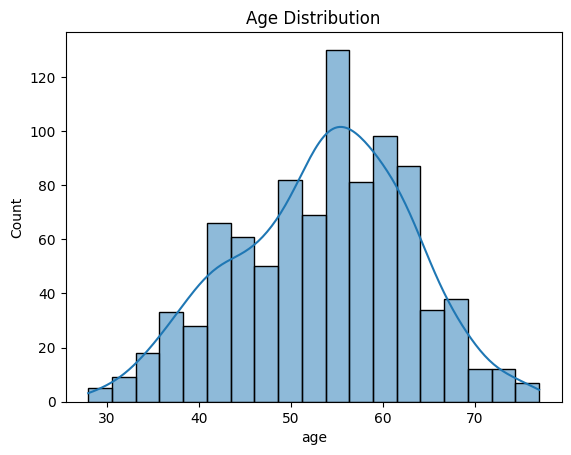

In [91]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


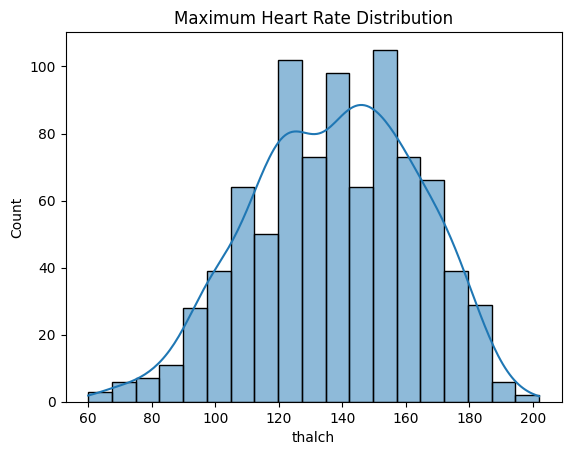

In [92]:
sns.histplot(df['thalch'], kde=True)
plt.title("Maximum Heart Rate Distribution")
plt.show()

#### Target vs Numerical Features

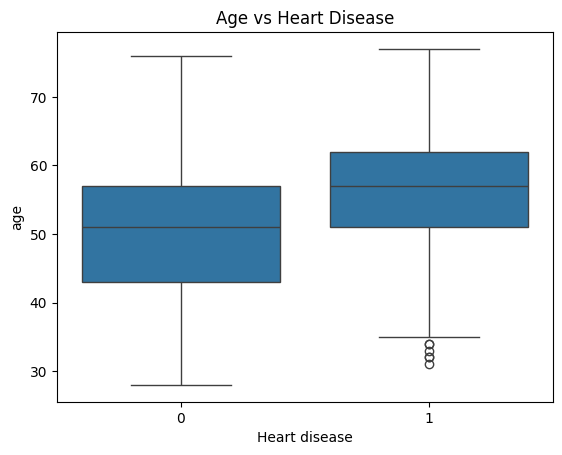

In [93]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.xlabel('Heart disease')
plt.show()


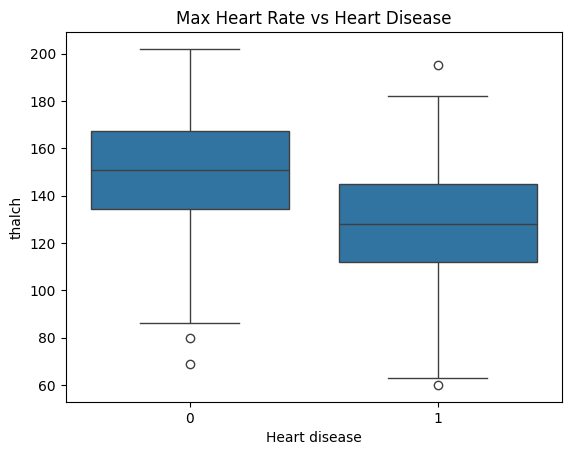

In [94]:
sns.boxplot(x='target', y='thalch', data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.xlabel('Heart disease')
plt.show()


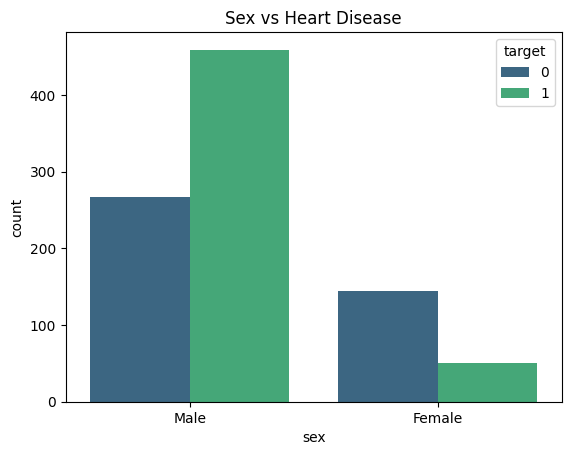

In [95]:
sns.countplot(x='sex', palette='viridis', hue='target', data=df)
plt.title("Sex vs Heart Disease")
plt.show()


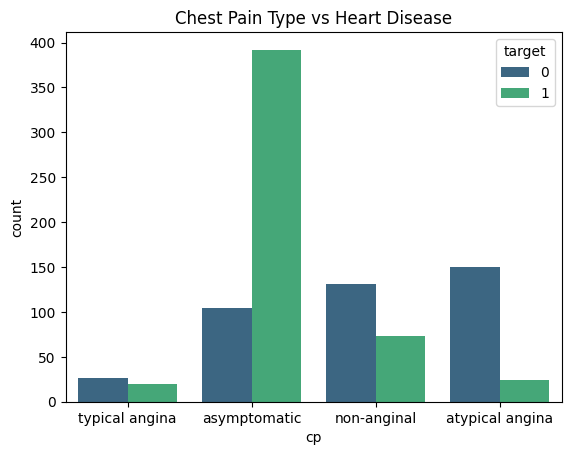

In [96]:
sns.countplot(x='cp', palette='viridis', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()


#### correlation analysis

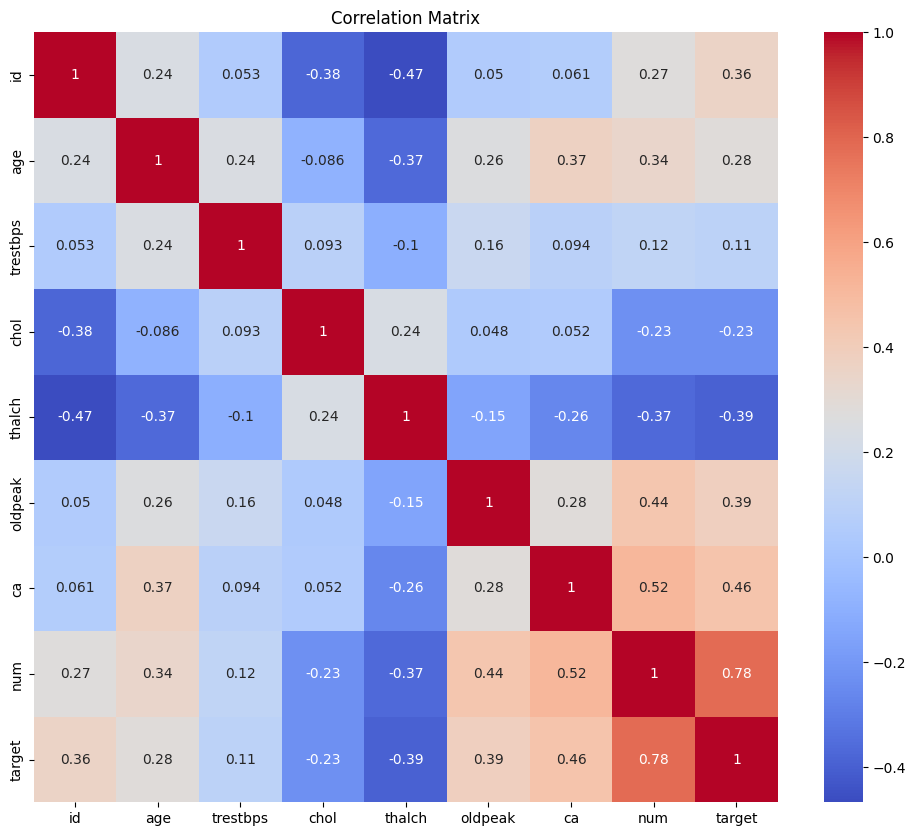

In [97]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#### Identifying X and y

In [98]:
X = df.drop(['num', 'target','id', 'dataset'], axis=1)
y = df['num']

#### splitting the data

In [99]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# identifying categorical and numerical features
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype == 'object']
numerical_features = [col for col in all_features if X_train[col].dtype != 'object']

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


#### Imputing the data

In [100]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train_num = num_imputer.fit_transform(X_train[numerical_features])
X_test_num = num_imputer.transform(X_test[numerical_features])
X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])
X_test_cat = cat_imputer.transform(X_test[categorical_features])


In [101]:
X_train_num

array([[ 53. , 120. ,   0. ,  95. ,   0. ,   0. ],
       [ 74. , 130. ,   0. , 140. ,   0.5,   0. ],
       [ 53. , 130. ,   0. , 135. ,   1. ,   0. ],
       ...,
       [ 54. , 124. , 266. , 109. ,   2.2,   1. ],
       [ 58. , 150. , 283. , 162. ,   1. ,   0. ],
       [ 35. , 120. , 308. , 180. ,   0. ,   0. ]], shape=(736, 6))

In [102]:
X_test_num

array([[ 38., 110., 223., 150.,   1.,   0.],
       [ 61., 125.,   0., 105.,   0.,   0.],
       [ 62., 120., 254.,  93.,   0.,   0.],
       ...,
       [ 61., 150.,   0., 117.,   2.,   0.],
       [ 57., 140.,   0., 120.,   2.,   0.],
       [ 55., 116., 186., 102.,   0.,   0.]], shape=(184, 6))

In [103]:
X_train_cat

array([['Male', 'atypical angina', False, ..., False, 'flat', 'normal'],
       ['Male', 'non-anginal', False, ..., False, 'flat', 'normal'],
       ['Male', 'asymptomatic', False, ..., True, 'flat',
        'reversable defect'],
       ...,
       ['Male', 'asymptomatic', False, ..., True, 'flat',
        'reversable defect'],
       ['Female', 'typical angina', True, ..., False, 'upsloping',
        'normal'],
       ['Male', 'atypical angina', False, ..., False, 'flat', 'normal']],
      shape=(736, 7), dtype=object)

In [104]:
X_test_cat

array([['Male', 'asymptomatic', False, ..., True, 'flat', 'normal'],
       ['Male', 'asymptomatic', False, ..., True, 'downsloping',
        'reversable defect'],
       ['Male', 'atypical angina', False, ..., True, 'flat', 'normal'],
       ...,
       ['Male', 'asymptomatic', False, ..., True, 'flat',
        'reversable defect'],
       ['Male', 'asymptomatic', False, ..., True, 'flat', 'fixed defect'],
       ['Male', 'asymptomatic', True, ..., False, 'flat', 'normal']],
      shape=(184, 7), dtype=object)

#### Encode Categorical Features

In [105]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)


In [106]:
X_train_cat_encoded, X_test_cat_encoded

(array([[1., 1., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.],
        [1., 1., 0., ..., 0., 1., 0.]], shape=(736, 12)),
 array([[1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 1., 0.]], shape=(184, 12)))

#### Scale Numeric Features (StandardScaler)

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [108]:
X_train_num_scaled, X_test_num_scaled

(array([[-0.03345722, -0.62740778, -1.79972681, -1.70040516, -0.80309623,
         -0.36137139],
        [ 2.19548588, -0.09127388, -1.79972681,  0.08484238, -0.32970297,
         -0.36137139],
        [-0.03345722, -0.09127388, -1.79972681, -0.11351846,  0.14369029,
         -0.36137139],
        ...,
        [ 0.07268293, -0.41295422,  0.62771595, -1.14499482,  1.27983412,
          1.22177946],
        [ 0.49724352,  0.98099391,  0.78285327,  0.95763007,  0.14369029,
         -0.36137139],
        [-1.94397988, -0.62740778,  1.01099638,  1.67172909, -0.80309623,
         -0.36137139]], shape=(736, 6)),
 array([[-1.62555944, -1.16354167,  0.23530979,  0.48156406,  0.14369029,
         -0.36137139],
        [ 0.81566396, -0.35934083, -1.79972681, -1.30368349, -0.80309623,
         -0.36137139],
        [ 0.92180411, -0.62740778,  0.51820725, -1.7797495 , -0.80309623,
         -0.36137139],
        ...,
        [ 0.81566396,  0.98099391, -1.79972681, -0.82761748,  1.09047681,
         

In [109]:
print(categorical_features)
print(len(categorical_features))

print(X_train[categorical_features].head())
print(X_train[categorical_features].dtypes)


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
7
      sex               cp    fbs           restecg  exang slope  \
637  Male  atypical angina  False            normal  False  flat   
743  Male      non-anginal  False            normal    NaN   NaN   
643  Male     asymptomatic  False    lv hypertrophy   True  flat   
694  Male     asymptomatic    NaN            normal   True  flat   
913  Male     asymptomatic  False  st-t abnormality   True   NaN   

                  thal  
637             normal  
743                NaN  
643  reversable defect  
694             normal  
913                NaN  
sex        object
cp         object
fbs        object
restecg    object
exang      object
slope      object
thal       object
dtype: object


#### Combining the numerical and categorical features

In [118]:
X_train_num_df = pd.DataFrame(
    X_train_num_scaled,
    columns=numerical_features,
    index=X_train.index
)

X_test_num_df = pd.DataFrame(
    X_test_num_scaled,
    columns=numerical_features,
    index=X_test.index
)

cat_feature_names = encoder.get_feature_names_out(categorical_features)

X_train_cat_df = pd.DataFrame(
    X_train_cat_encoded,
    columns=cat_feature_names,
    index=X_train.index
)

X_test_cat_df = pd.DataFrame(
    X_test_cat_encoded,
    columns=cat_feature_names,
    index=X_test.index
)

X_train_final = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

In [119]:
X_test_final

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
529,-1.625559,-1.163542,0.235310,0.481564,0.143690,-0.361371,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
683,0.815664,-0.359341,-1.799727,-1.303683,-0.803096,-0.361371,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
919,0.921804,-0.627408,0.518207,-1.779749,-0.803096,-0.361371,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
146,0.391103,1.785195,0.837608,-0.549912,0.143690,4.388081,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1.664785,-0.091274,0.673345,0.084842,-0.329703,-0.361371,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.245738,-0.359341,0.144053,-0.510240,0.522405,1.221779,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
572,0.178823,1.517128,0.864985,0.203859,1.090477,-0.361371,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
687,0.815664,0.980994,-1.799727,-0.827617,1.090477,-0.361371,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
662,0.391103,0.444860,-1.799727,-0.708601,1.090477,-0.361371,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [120]:
X_train_final

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
637,-0.033457,-0.627408,-1.799727,-1.700405,-0.803096,-0.361371,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
743,2.195486,-0.091274,-1.799727,0.084842,-0.329703,-0.361371,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
643,-0.033457,-0.091274,-1.799727,-0.113518,0.143690,-0.361371,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
694,0.921804,-0.895475,-1.799727,-2.612865,-1.276489,-0.361371,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
913,0.921804,1.409901,-0.248354,0.005498,-0.803096,-0.361371,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.882578,-1.163542,0.609464,-0.232535,0.333048,-0.361371,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
242,-0.458018,-0.091274,0.655093,0.997302,-0.803096,-0.361371,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
55,0.072683,-0.412954,0.627716,-1.144995,1.279834,1.221779,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
21,0.497244,0.980994,0.782853,0.957630,0.143690,-0.361371,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#### Training the model

In [121]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

In [115]:
y_pred

array([1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 1, 2, 1,
       0, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 0, 3, 1, 2, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 3, 0, 3, 0, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 3, 3, 0, 2, 0, 3,
       1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 4, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 3, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3,
       0, 0, 0, 1, 0, 3, 2, 1])

#### Model Evaluation

In [122]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5652173913043478
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        82
           1       0.46      0.53      0.49        53
           2       0.30      0.14      0.19        22
           3       0.19      0.19      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.34      0.34      0.33       184
weighted avg       0.53      0.57      0.54       184

